<a href="https://colab.research.google.com/github/vidya715/Vidya-jagtap-/blob/main/prasunetdatasciencetask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

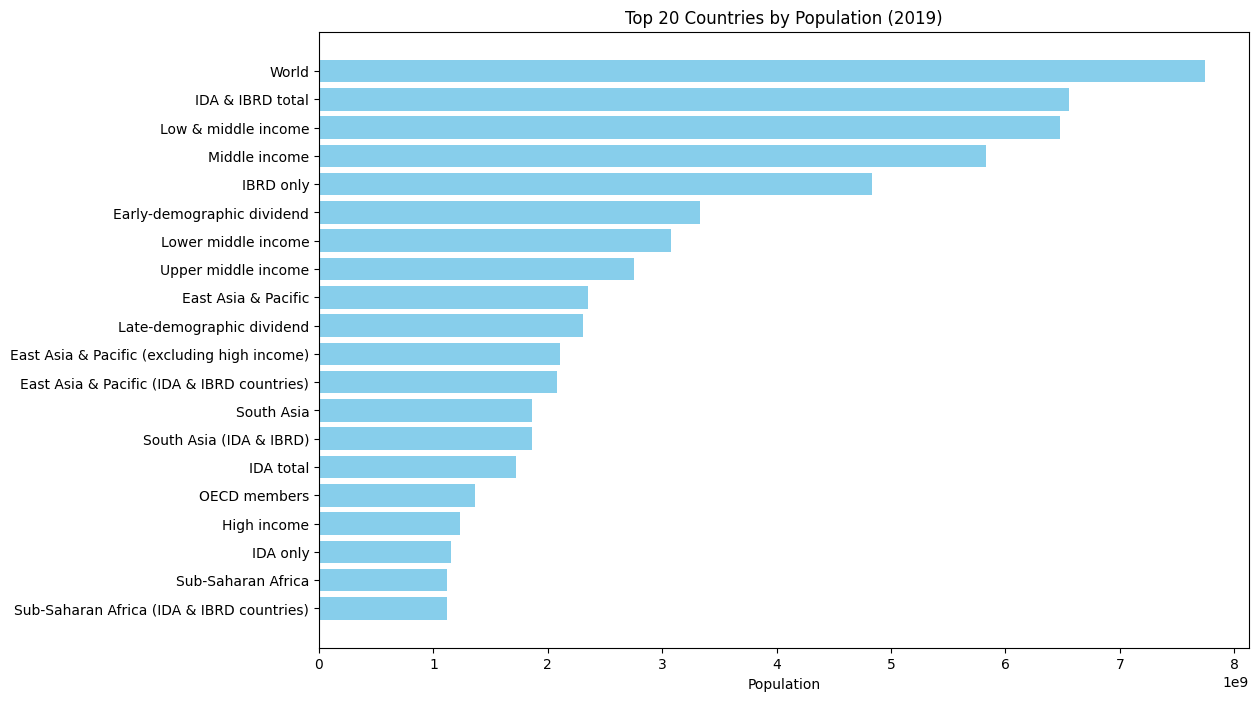

In [ ]:
# task1
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Fetching data from the World Bank API
url = 'http://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL?date=2019&format=json'
response = requests.get(url)
data = response.json()

# Extracting data from the response
records = []
for entry in data[1]:
    country_iso3 = entry['countryiso3code']
    country_name = entry['country']['value']
    population = entry['value']
    records.append((country_iso3, country_name, population))

# Creating DataFrame from extracted records
df = pd.DataFrame(records, columns=['Country Code', 'Country Name', 'Population'])

# Cleaning up DataFrame
df['Population'] = pd.to_numeric(df['Population'], errors='coerce')  # Convert population to numeric
df.dropna(subset=['Population'], inplace=True)  # Drop rows with missing population data

# Sorting data for visualization
df_sorted = df.sort_values(by='Population', ascending=False).head(20)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(df_sorted['Country Name'], df_sorted['Population'], color='skyblue')
plt.xlabel('Population')
plt.title('Top 20 Countries by Population (2019)')
plt.gca().invert_yaxis()  # Invert y-axis to have highest population at the top
plt.show()



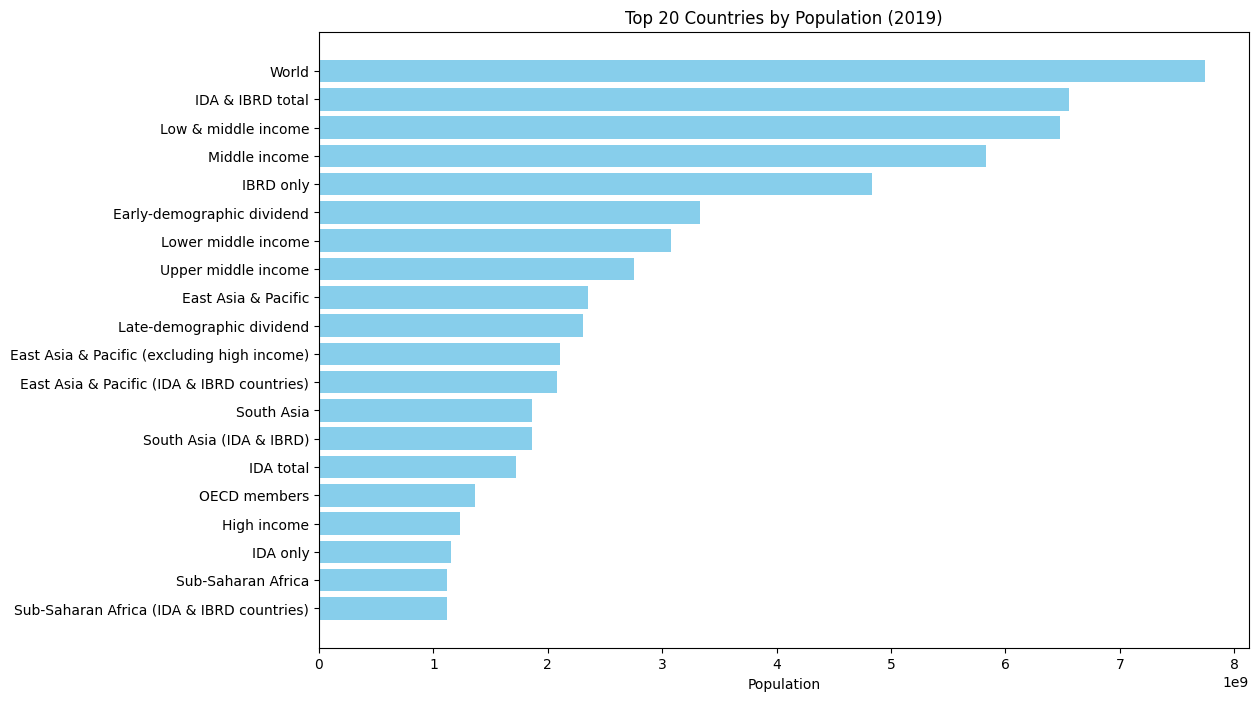

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Fetching data from the World Bank API
url = 'http://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL?date=2019&format=json'
response = requests.get(url)
data = response.json()

# Extracting data from the response
records = []
for entry in data[1]:
    country_iso3 = entry['countryiso3code']
    country_name = entry['country']['value']
    population = entry['value']
    records.append((country_iso3, country_name, population))

# Creating DataFrame from extracted records
df = pd.DataFrame(records, columns=['Country Code', 'Country Name', 'Population'])

# Cleaning up DataFrame
df['Population'] = pd.to_numeric(df['Population'], errors='coerce')  # Convert population to numeric
df.dropna(subset=['Population'], inplace=True)  # Drop rows with missing population data

# Sort data by population for better visualization
df_sorted = df.sort_values(by='Population', ascending=False).head(20)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(df_sorted['Country Name'], df_sorted['Population'], color='skyblue')
plt.xlabel('Population')
plt.title('Top 20 Countries by Population (2019)')
plt.gca().invert_yaxis()  # Invert y-axis to have highest population at the top
plt.show()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

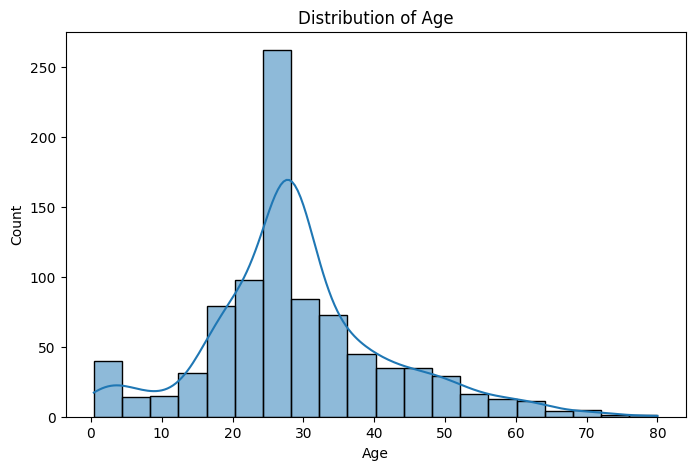

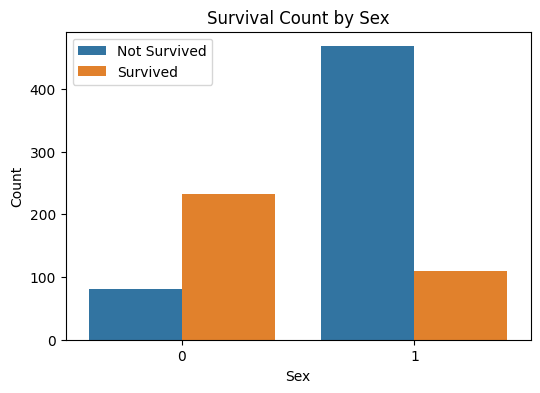

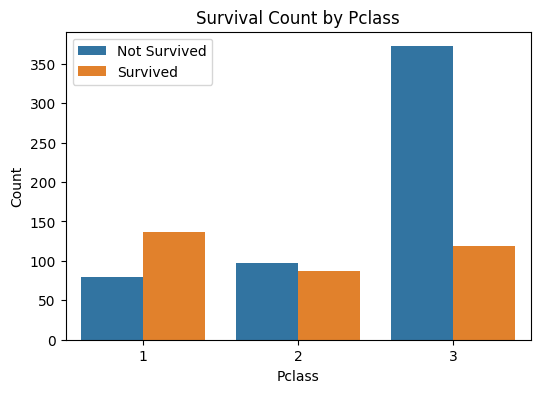

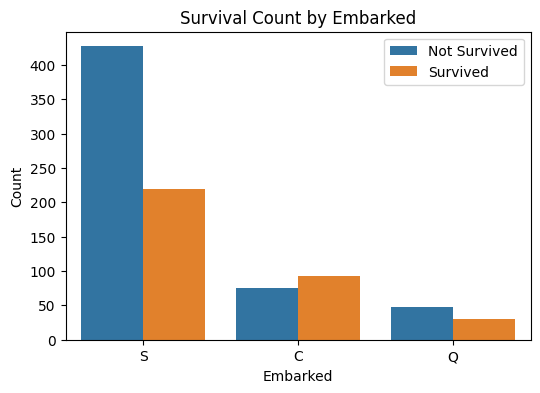

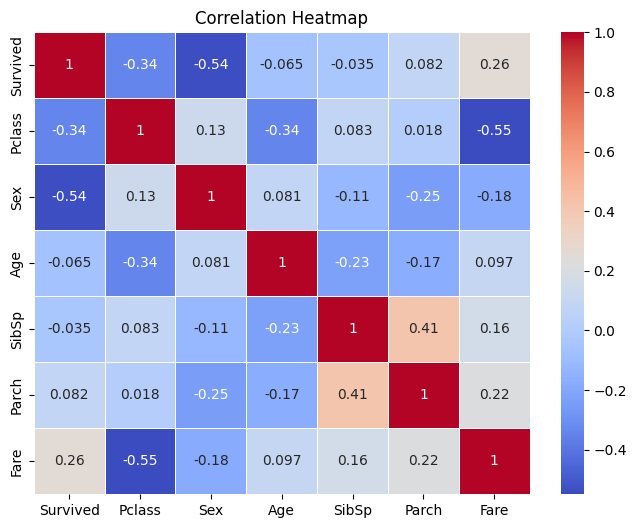

In [ ]:
# task 2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (adjust the file path as necessary)
file_path = r'D:\Downloads\titanic\train.csv'
df = pd.read_csv("/content/train.csv")

# Display the first few rows to understand the structure
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Handle missing values in Age and Embarked
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop unnecessary columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Convert categorical variables to numeric (if needed)
# Example: Convert 'Sex' to numeric using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# EDA

# Distribution of Age
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Survival rate by Sex
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

# Survival rate by Pclass
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

# Survival rate by Embarked
plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival Count by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

# Correlation heatmap of numerical variables
# Select only numeric columns for correlation calculation
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# task 3
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from io import BytesIO
from zipfile import ZipFile
import requests

# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"

# Fetching the ZIP file from the URL
response = requests.get(url)

# Extracting the contents of the ZIP file in memory
with ZipFile(BytesIO(response.content)) as z:
    # Assuming the CSV file is named 'bank-additional-full.csv' inside the ZIP
    with z.open('bank-additional/bank-additional-full.csv') as f:
        df = pd.read_csv(f, sep=';')

# Displaying the first few rows of the dataset
print("Sample of the dataset:")
print(df.head())

# Checking for any missing values
print("\nMissing values:")
print(df.isnull().sum())

# Encoding categorical variables
le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])  # Converting target variable to numeric

# Selecting features and target variable
X = df.drop('y', axis=1)
y = df['y']

# One-hot encoding categorical variables
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Training the classifier
dt_classifier.fit(X_train, y_train)

# Making predictions
y_pred = dt_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Displaying classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Sample of the dataset:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx 

In [ ]:
import pandas as pd
import csv
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Specify file path and optional parameters
file_path = 'D:\\Downloads\\twitter_training.csv'  # Adjust the path according to your file location
encoding = 'utf-8'  # Specify the encoding of your CSV file

# Step 2: Read CSV file into Pandas DataFrame with error handling
try:
    df = pd.read_csv("/content/twitter_training.csv")
except pd.errors.ParserError as e:
    print(f"ParserError: {e}")
    print("Attempting to read with csv module for manual parsing...")

    # Option 2: Using csv module for manual parsing
    data = []
    with open(file_path, 'r', encoding=encoding, errors='replace') as csvfile:
        csvreader = csv.reader(csvfile)
        for row in csvreader:
            data.append(row)

    df = pd.DataFrame(data[1:], columns=data[0])  # Assuming the first row is header

# Step 3: Display first few rows to verify
print(df.head())

# Step 4: Perform additional data analysis or visualization
# Check if 'text' column exists in df
if 'text' in df.columns:
    # Import NLTK VADER lexicon if not already downloaded
    nltk.download('vader_lexicon')

    # Initialize VADER sentiment analyzer
    sid = SentimentIntensityAnalyzer()

    # Compute sentiment scores
    df['sentiment_compound'] = df['text'].apply(lambda x: sid.polarity_scores(x)['compound'])

    # Categorize sentiment labels
    df['sentiment_label'] = df['sentiment_compound'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

    # Plot sentiment distribution
    plt.figure(figsize=(8, 6))
    sns.countplot(x='sentiment_label', data=df, palette='viridis')
    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

    # Plot sentiment over time (if your dataset has timestamps)
    # Replace 'timestamp' with your actual timestamp column name
    if 'timestamp' in df.columns:
        plt.figure(figsize=(12, 8))
        sns.lineplot(x='timestamp', y='sentiment_compound', data=df, estimator=None, lw=1)
        plt.title('Sentiment Over Time')
        plt.xlabel('Timestamp')
        plt.ylabel('Compound Sentiment Score')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("No timestamp column found in the dataset. Skipping time series plot.")
else:
    print("Column 'text' not found in the dataset. Please check your CSV file and column names.")


   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     
Column 'text' not found in the dataset. Please check your CSV file and column names.


    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          F

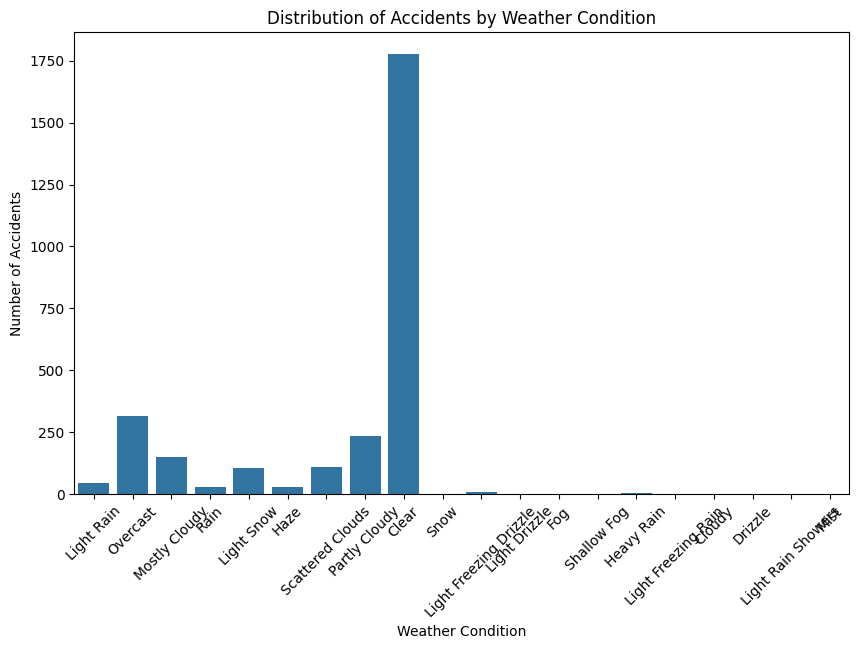

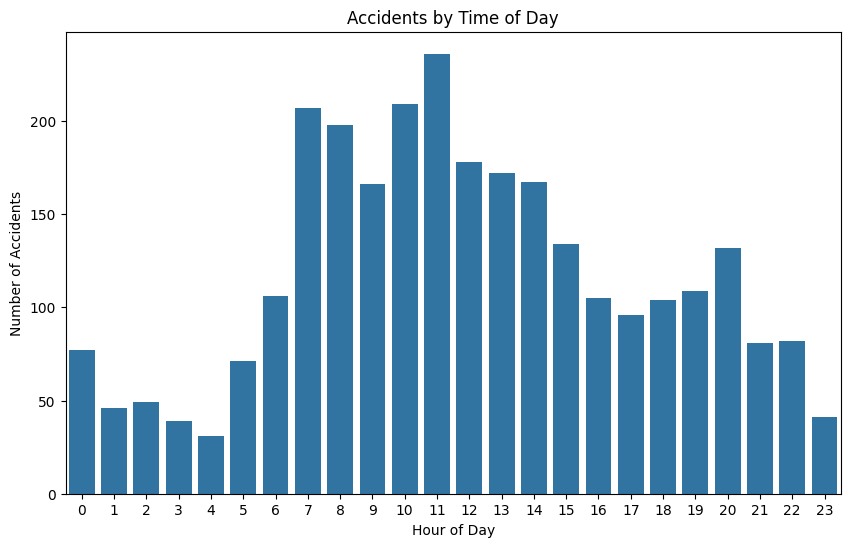

Cleaned data saved to /content/cleaned_US_Accidents_March23.csv


In [10]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import os

# Step 1: Read the CSV file into a DataFrame
file_path = "/content/US_Accidents_March23.csv"  # Adjust the path according to your actual file location
df = pd.read_csv('/content/US_Accidents_March23.csv')

# Step 2: Basic Data Exploration and Cleaning
# Display the first few rows of the DataFrame
print(df.head())

# Check the structure and data types of columns
print(df.info())

# Step 3: Data Cleaning (if necessary)
# For example, drop duplicates
df.drop_duplicates(inplace=True)

# Step 4: Exploratory Data Analysis (EDA)

# Example 1: Distribution of accidents by road conditions
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather_Condition', data=df)
plt.title('Distribution of Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# Example 2: Visualize accident hotspots (using a sample due to large dataset)
# Create a base map centered on the mean latitude and longitude
map_accidents = folium.Map(location=[df['Start_Lat'].mean(), df['Start_Lng'].mean()], zoom_start=5)

# Add markers for a sample of accidents
for i, row in df.sample(1000).iterrows():
    folium.Marker([row['Start_Lat'], row['Start_Lng']]).add_to(map_accidents)

# Save the map as an HTML file
map_accidents.save('/content/accident_hotspots.html')

# Example 3: Time analysis - accidents by hour of day
df['Start_Time'] = pd.to_datetime(df['Start_Time'])  # Convert Start_Time to datetime if not already
df['Hour'] = df['Start_Time'].dt.hour

plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=df)
plt.title('Accidents by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

# Step 5: Save or export any processed data or visualizations as needed

# Optionally, save the cleaned DataFrame to a new CSV file
# Specify the directory path where you want to save the file
directory = "/content/"
if not os.path.exists(directory):
    os.makedirs(directory)

cleaned_file_path = "/content/cleaned_US_Accidents_March23.csv"
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to {cleaned_file_path}")
